## Name: Batyrkhan Taldybayev
## Group: IT3-2203
## Date: 13.04.2025
---
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


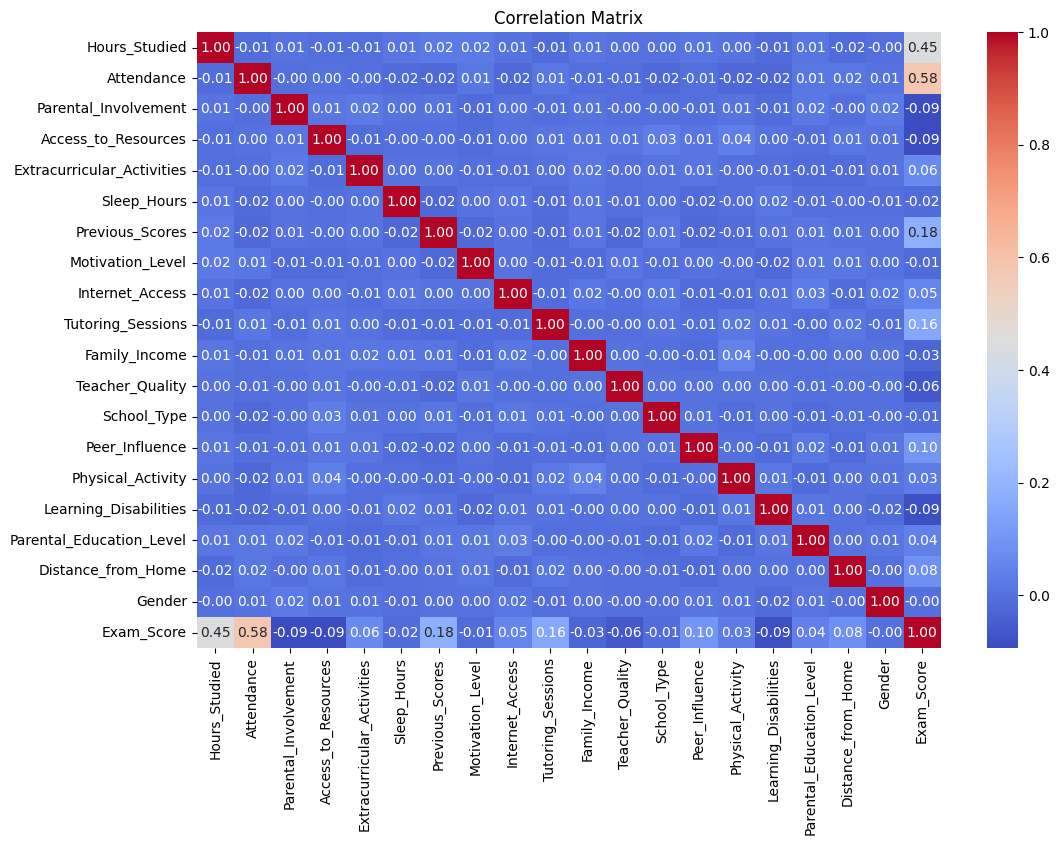

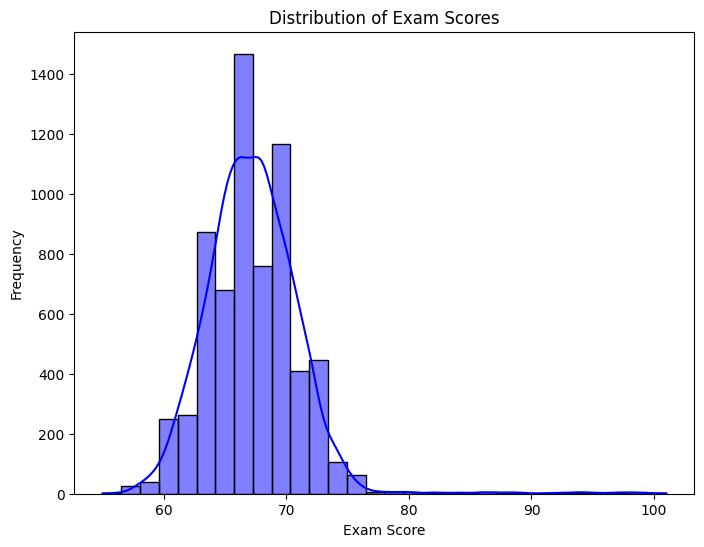

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Распределение целевой переменной (Exam_Score)
plt.figure(figsize=(8, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [5]:
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=69)
X_tsne = tsne.fit_transform(X_scaled)

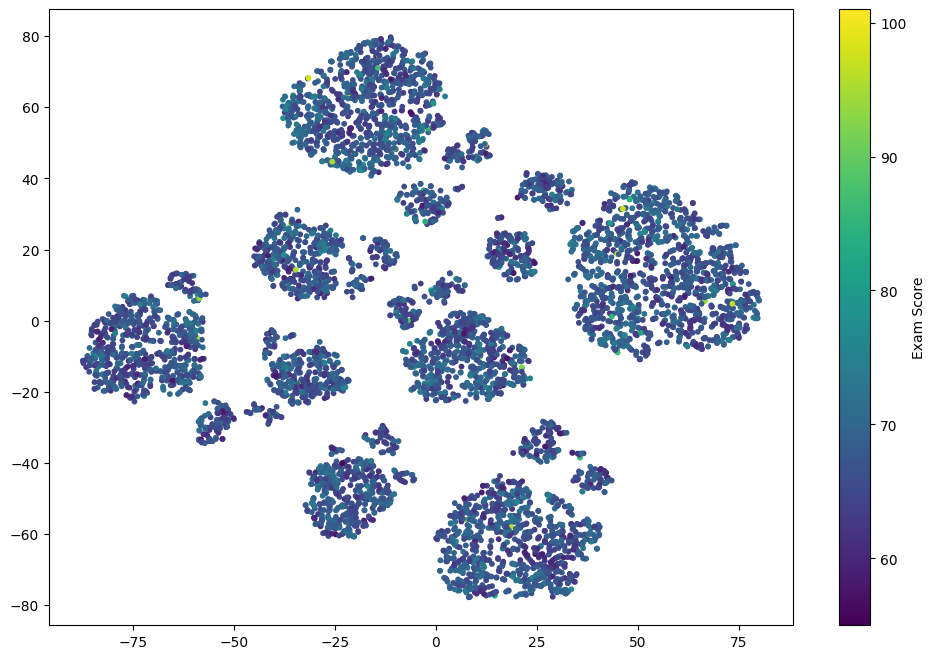

In [6]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(scatter, label='Exam Score')
plt.show()

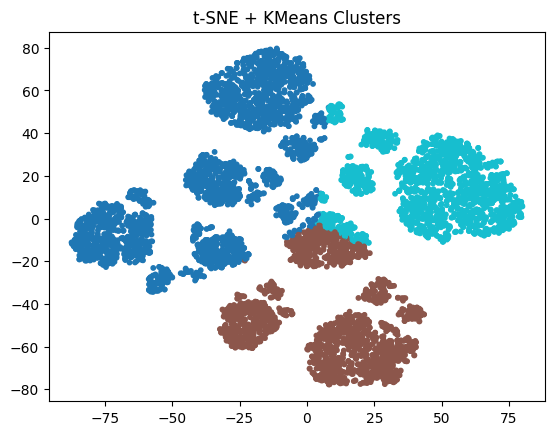

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=69)
clusters = kmeans.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', s=10)
plt.title('t-SNE + KMeans Clusters')
plt.show()

In [8]:
data['Cluster'] = clusters
data.groupby('Cluster').mean(numeric_only=True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Cluster,,,,,,,,,,,,,,,,,,,,
0,20.032998,79.805141,1.191039,1.199027,0.604029,7.033692,75.139632,1.293505,0.925321,1.499826,1.208406,1.333449,0.659604,1.177145,2.955193,0.131643,0.925669,1.507815,0.047933,67.241403
1,19.959110,80.215321,1.182712,1.151656,0.208592,7.011387,74.681159,1.361284,0.946687,1.477743,1.187371,1.322464,0.546584,1.197205,3.001553,0.083333,0.923913,1.528468,0.999482,67.127329
2,19.900334,79.997773,1.306793,1.266147,1.000000,7.040646,75.378619,1.272272,0.899220,1.501114,1.242205,1.306793,0.914811,1.206013,2.951002,0.086303,0.920379,1.488307,0.971604,67.342984


---
## Now, let's see the NMF

C:\Users\Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


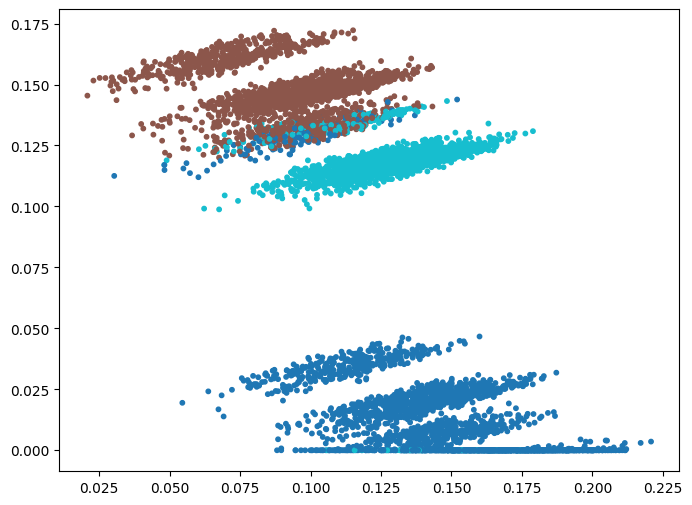

In [9]:
nmf = NMF(n_components=2, random_state=42)
X_nmf = nmf.fit_transform(X_scaled)

# Визуализируем полученные компоненты
plt.figure(figsize=(8, 6))
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=data['Cluster'], cmap='tab10', s=10)
plt.show()